In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Souvik\\Downloads\\Advertising.csv")

In [3]:
df.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
43,44,206.9,8.4,26.4,12.9
48,49,227.2,15.8,49.9,14.8
58,59,210.8,49.6,37.7,23.8
144,145,96.2,14.8,38.9,11.4
64,65,131.1,42.8,28.9,18.0
112,113,175.7,15.4,2.4,14.1
118,119,125.7,36.9,79.2,15.9
108,109,13.1,0.4,25.6,5.3
195,196,38.2,3.7,13.8,7.6
29,30,70.6,16.0,40.8,10.5


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.sample()

,TV,Radio,Newspaper,Sales
32,97.2,1.5,30.0,9.6


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df=df[df['Newspaper']<=100]

In [11]:
df.shape

(198, 4)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

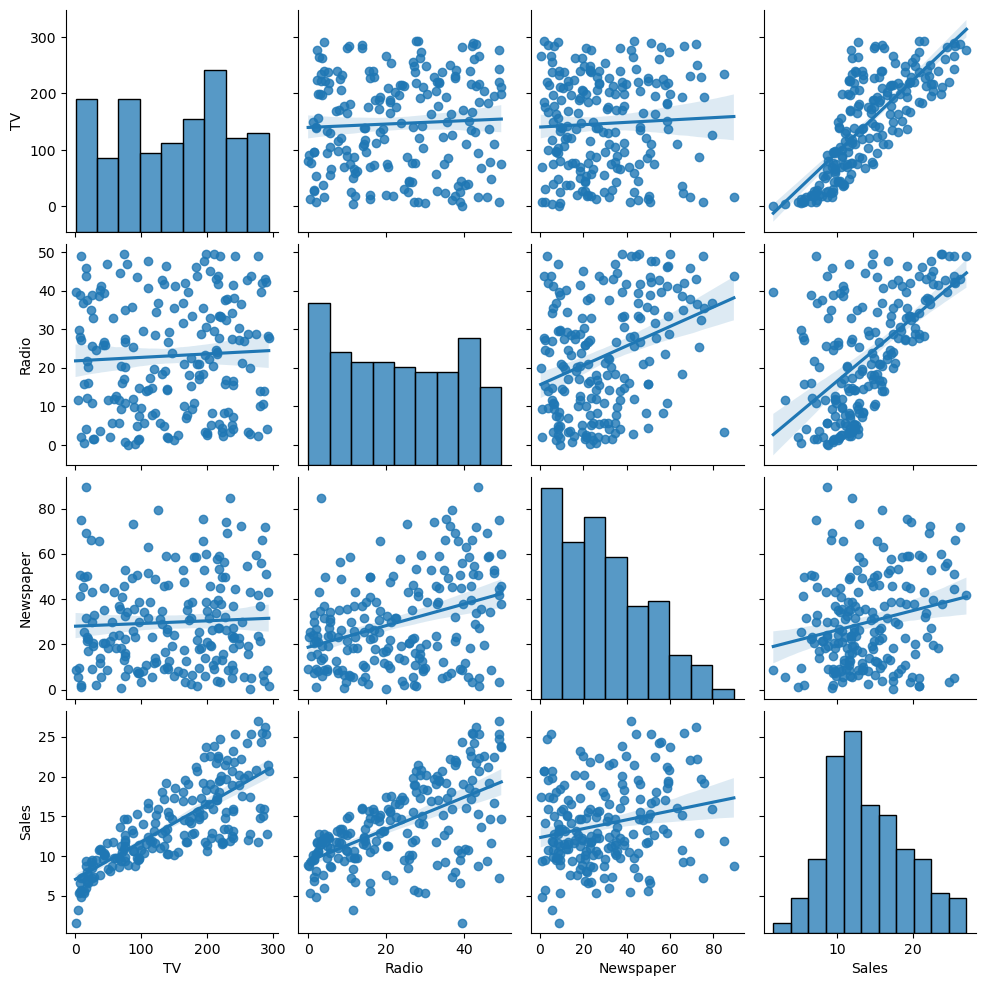

In [13]:
sns.pairplot(df,kind="reg")

# heatmap

C:\Users\Souvik\AppData\Local\Temp\ipykernel_7844\1677444173.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


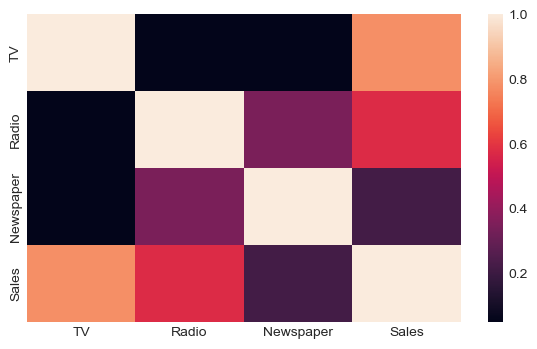

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

# separating input & output data

In [16]:
x=df.drop(columns=['Sales'])
y=df['Sales']

In [17]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.head()

,TV,Radio,Newspaper
145,140.3,1.9,9.0
109,255.4,26.9,5.5
164,117.2,14.7,5.4
100,222.4,4.3,49.8
76,27.5,1.6,20.7


In [24]:
y_train.head()

145    10.3
109    19.8
164    11.9
100    11.7
76      6.9
Name: Sales, dtype: float64

# building a model

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [26]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [27]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.961956659228181

# check prediction

In [28]:
pipe.predict([[145.4,24.0,56.3]])

array([15.06])

In [ ]:
#saved the model